## Imports:

In [1]:
#%% Imports

# Basic Imports 
import numpy as np
import pandas as pd

# Plotting Imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from networkx import DiGraph
import networkx as nx

## Reading in the Datafile:

In [2]:
df = pd.read_csv('geneDiseaseNetwork.tsv', sep = "\t")

#Printing the first few rows to get a superficial understanding of the dataset
df.head()

/mnt/home/f0102402/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,NID,diseaseNID,geneNID,source,association,associationType,sentence,pmid,score,EL,EI,year
0,1130681,2107,793,BEFREE,NaN,Biomarker,No correlation could be found between Broder's...,1000501.0,0.10,NaN,0.956175,1976.0
1,261998,431,775,BEFREE,NaN,GeneticVariation,"However, there are few reports describing soma...",10021299.0,0.40,NaN,0.987013,1999.0
2,369637,450,775,BEFREE,NaN,GeneticVariation,WAF1 genotype and endometrial cancer susceptib...,10021299.0,0.02,NaN,1.000000,1999.0
3,2128526,10033,775,BEFREE,NaN,GeneticVariation,WAF1 genotype and endometrial cancer susceptib...,10021299.0,0.07,NaN,1.000000,1999.0
4,262799,431,7385,BEFREE,NaN,Biomarker,APC and APC2 may therefore have comparable fun...,10021369.0,0.01,NaN,1.000000,1999.0


## Hierarchy of Association Types:
Image taken from https://www.disgenet.org/dbinfo

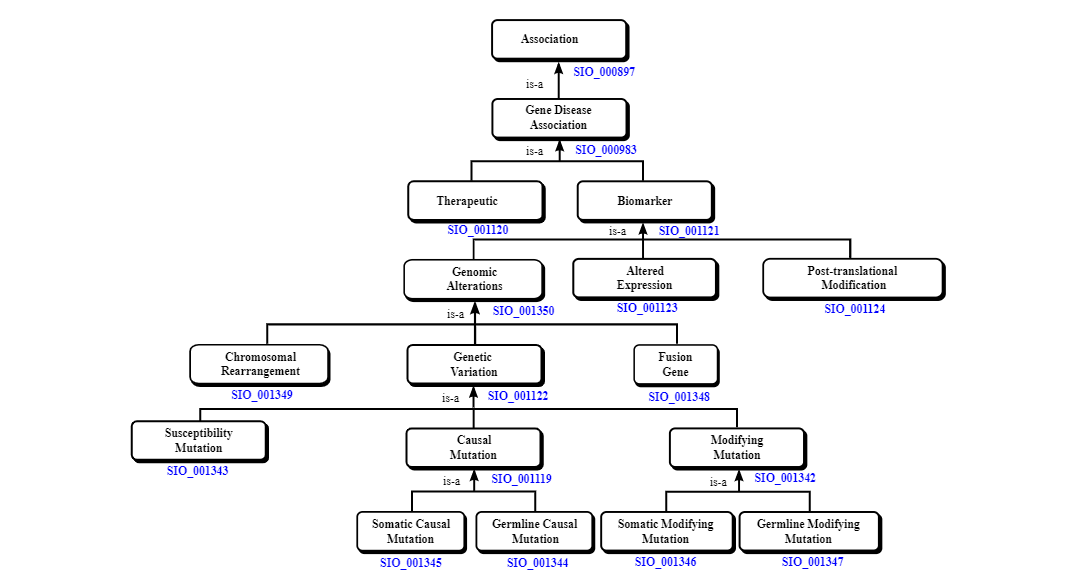

In [3]:
from IPython import display
display.Image("./hierarchy.PNG")

### The description of each association type in the ontology is:

- Therapeutic: This relationship indicates that the gene/protein has a therapeutic role in the amelioration of the disease.
- Biomarker: This relationship indicates that the gene/protein either plays a role in the etiology of the disease (e.g. participates in the molecular mechanism that leads to disease) or is a biomarker for a disease.
- Genomic Alterations: This relationship indicates that a genomic alteration is linked to the gene associated with the disease phenotype.
- GeneticVariation: This relationship indicates that a sequence variation (a mutation, a SNP) is associated with the disease phenotype, but there is still no evidence to say that the variation causes the disease.
- Causal Mutation: This relationship indicates that there are allelic variants or mutations known to cause the disease.
- Germline Causal Mutation: This relationship indicates that there are germline allelic variants or mutations known to cause the disease, and they may be passed on to offspring.
- Somatic Causal Mutation: This relationship indicates that there are somatic allelic variants or mutations known to cause the disease, but they may not be passed on to offspring.
- Chromosomal Rearrangement: This relationship indicates that a gene is included in a chromosomal rearrangement associated with a particular manifestation of the disease.
- Fusion Gene: This relationship indicates that the fusion between two different genes (between promoter and/or other coding DNA regions) is associated with the disease.
- Susceptibility Mutation: This relationship indicates that a gene mutation in a germ cell that predisposes to the development of a disorder, and that is necessary but not sufficient for the manifestation of the disease.
- Modifying Mutation: This relationship indicates that a gene mutation is known to modify the clinical presentation of the disease.
- Germline Modifying Mutation: This relationship indicates that a germline gene mutation modifies the clinical presentation of the disease, and it may be passed on to offspring.
- Somatic Modifying Mutation: This relationship indicates that a somatic gene mutation modifies the clinical presentation of the disease, but it may not be passed on to offspring.
- AlteredExpression: This relationship indicates that an altered expression of the gene is associated with the disease phenotype.
- Post-translational Modification: This relationship indicates that alterations in the function of the protein by means of post-translational modifications (methylation or phosphorylation of the protein) are associated with the disease phenotype.

In [3]:
df2 = df.drop(columns = ['NID', 'source', 'association', 'sentence', 'pmid', 'score', 'EI', 'EL', 'year']).sort_values(by = 'diseaseNID')
df2.head()

,diseaseNID,geneNID,associationType
2301409,1,1088,Biomarker
349565,1,3070,Biomarker
2311486,2,10721,Biomarker
3057924,3,2680,Biomarker
3057946,3,10946,Biomarker


## Spotchecking:

In [6]:
therap = df2[df2['associationType'].map(lambda d: d) == "Therapeutic"]
therap

,diseaseNID,geneNID,associationType
1564203,9,632,Therapeutic
920622,9,632,Therapeutic
1459023,26,3832,Therapeutic
3053008,32,2575,Therapeutic
1831176,40,7118,Therapeutic
...,...,...,...
123307,29780,1063,Therapeutic
1950350,29821,2247,Therapeutic
1950351,29821,3140,Therapeutic
1950352,29821,4581,Therapeutic


In [8]:
nine = df2[df2['diseaseNID'].map(lambda d: d) == 9]
nine

,diseaseNID,geneNID,associationType
1564203,9,632,Therapeutic
920622,9,632,Therapeutic
1523028,9,5480,Biomarker
1793096,9,10090,Biomarker
1191834,9,1513,Biomarker
1523027,9,296,Biomarker


In [13]:
twentysix = df2[df2['diseaseNID'].map(lambda d: d) == 26]
twentysix

,diseaseNID,geneNID,associationType
3058492,26,3645,Biomarker
3058498,26,10031,Biomarker
2487227,26,12274,GeneticVariation
3058469,26,3255,Biomarker
3058468,26,3253,Biomarker
...,...,...,...
2861895,26,5122,AlteredExpression
3058398,26,7939,Biomarker
150348,26,3897,GeneticVariation
3058559,26,7137,Biomarker


In [14]:
twentysixgene = twentysix[twentysix['geneNID'].map(lambda d: d) == 3832]
twentysixgene

,diseaseNID,geneNID,associationType
1459023,26,3832,Therapeutic


In [4]:
df2.sort_values(by = ['geneNID']).head(50)

,diseaseNID,geneNID,associationType
934224,28764,1,Biomarker
2609642,245,1,Biomarker
656820,53,1,AlteredExpression
1871674,1102,1,Biomarker
2870106,5532,1,Biomarker
2870107,11845,1,GeneticVariation
2693350,566,1,Biomarker
2870105,4398,1,Biomarker
2975513,24058,1,Biomarker
1862628,1371,1,Biomarker


## Propagating the Dataset:
### Step 1: Combining Rows with same Gene and Disease:

In [4]:
df3 = df2.groupby(by = ['diseaseNID', 'geneNID'])['associationType'].apply(lambda x: set(x))
df3.head(15)

diseaseNID  geneNID
1           1088       {Biomarker}
            3070       {Biomarker}
2           10721      {Biomarker}
3           54         {Biomarker}
            170        {Biomarker}
            214        {Biomarker}
            318        {Biomarker}
            496        {Biomarker}
            522        {Biomarker}
            525        {Biomarker}
            944        {Biomarker}
            1101       {Biomarker}
            1336       {Biomarker}
            1358       {Biomarker}
            1395       {Biomarker}
Name: associationType, dtype: object

In [5]:
df3 = df3.reset_index()

In [6]:
df3

,diseaseNID,geneNID,associationType
0,1,1088,{Biomarker}
1,1,3070,{Biomarker}
2,2,10721,{Biomarker}
3,3,54,{Biomarker}
4,3,170,{Biomarker}
...,...,...,...
1135040,30292,11963,{AlteredExpression}
1135041,30292,18471,{Biomarker}
1135042,30292,19792,{Biomarker}
1135043,30293,6353,{Biomarker}


In [7]:
df3.head(50)

,diseaseNID,geneNID,associationType
0,1,1088,{Biomarker}
1,1,3070,{Biomarker}
2,2,10721,{Biomarker}
3,3,54,{Biomarker}
4,3,170,{Biomarker}
5,3,214,{Biomarker}
6,3,318,{Biomarker}
7,3,496,{Biomarker}
8,3,522,{Biomarker}
9,3,525,{Biomarker}


## Continuation of Spot Checking:

In [68]:
therap = df3[df3['associationType'].map(lambda d: d) == {'Therapeutic'}]
therap

,diseaseNID,geneNID,associationType
1587,9,632,{Therapeutic}
2708,26,3832,{Therapeutic}
3410,40,271,{Therapeutic}
3412,40,1013,{Therapeutic}
3413,40,1170,{Therapeutic}
...,...,...,...
1121948,29780,2501,{Therapeutic}
1126736,29821,2247,{Therapeutic}
1126737,29821,3140,{Therapeutic}
1126739,29821,3833,{Therapeutic}


### Step 2: Creating a Digraph/Tree for the Association Type Hierarchy:

In [8]:
G = nx.DiGraph()

In [9]:
G.add_node('Therapeutic')

In [10]:
G.add_node('Biomarker')
G.add_node('GenomicAlterations')
G.add_node('AlteredExpression')
G.add_node('PosttranslationalModification')
G.add_node('ChromosomalRearrangement')
G.add_node('GeneticVariation')
G.add_node('FusionGene')
G.add_node('SusceptibilityMutation')
G.add_node('CausalMutation')
G.add_node('ModifyingMutation')
G.add_node('SomaticCausalMutation')
G.add_node('GermlineCausalMutation')
G.add_node('GermlineModifyingMutation')
G.add_node('SomaticModifyingMutation')

In [34]:
#Note: I DID NOT NEED TO WRITE OUT ALL THE PAIRS LIKE THIS, I JUST NEEDED TO WRITE THE UNIQUE NODES
#I did not change it because it did not affect it at all by writing it in pairs
K3 = nx.Graph([('Biomarker', 'GenomicAlterations'), ('Biomarker', 'AlteredExpression'), ('Biomarker', 'PosttranslationalModification'), 
               ('GenomicAlterations','ChromosomalRearrangement'), ('GenomicAlterations','GeneticVariation'), ('GenomicAlterations','FusionGene'), 
               ('GeneticVariation', 'SusceptibilityMutation'), ('GeneticVariation', 'CausalMutation'), ('GeneticVariation', 'ModifyingMutation'), 
               ('CausalMutation', 'SomaticCausalMutation'), ('CausalMutation', 'GermlineCausalMutation'), 
               ('ModifyingMutation', 'SomaticModifyingMutation'), ('ModifyingMutation', 'GermlineModifyingMutation')])

In [24]:
G.add_nodes_from(K3)

In [11]:
G.add_edges_from([('Biomarker', 'GenomicAlterations'), ('Biomarker', 'AlteredExpression'), ('Biomarker', 'PosttranslationalModification'), 
               ('GenomicAlterations','ChromosomalRearrangement'), ('GenomicAlterations','GeneticVariation'), ('GenomicAlterations','FusionGene'), 
               ('GeneticVariation', 'SusceptibilityMutation'), ('GeneticVariation', 'CausalMutation'), ('GeneticVariation', 'ModifyingMutation'), 
               ('CausalMutation', 'SomaticCausalMutation'), ('CausalMutation', 'GermlineCausalMutation'), 
               ('ModifyingMutation', 'SomaticModifyingMutation'), ('ModifyingMutation', 'GermlineModifyingMutation')])

In [12]:
G.degree

DiDegreeView({'Therapeutic': 0, 'Biomarker': 3, 'GenomicAlterations': 4, 'AlteredExpression': 1, 'PosttranslationalModification': 1, 'ChromosomalRearrangement': 1, 'GeneticVariation': 4, 'FusionGene': 1, 'SusceptibilityMutation': 1, 'CausalMutation': 3, 'ModifyingMutation': 3, 'SomaticCausalMutation': 1, 'GermlineCausalMutation': 1, 'GermlineModifyingMutation': 1, 'SomaticModifyingMutation': 1})

### Step 3: Getting the Ancestors for a Certain Association Type (Example):

In [13]:
nx.algorithms.dag.ancestors(G, 'SomaticModifyingMutation')

{'Biomarker', 'GeneticVariation', 'GenomicAlterations', 'ModifyingMutation'}

In [14]:
nx.algorithms.dag.ancestors(G, 'Therapeutic')

set()

### Step 4: For Each Association Type in the Set in Each Row, Add the Association Types that are Ancestors of that Association Type:

In [69]:
therap

,diseaseNID,geneNID,associationType
1587,9,632,{Therapeutic}
2708,26,3832,{Therapeutic}
3410,40,271,{Therapeutic}
3412,40,1013,{Therapeutic}
3413,40,1170,{Therapeutic}
...,...,...,...
1121948,29780,2501,{Therapeutic}
1126736,29821,2247,{Therapeutic}
1126737,29821,3140,{Therapeutic}
1126739,29821,3833,{Therapeutic}


In [70]:
therap.to_csv('therap.csv', index = False)

In [71]:
therap = therap.reset_index()

In [72]:
therap

,index,diseaseNID,geneNID,associationType
0,1587,9,632,{Therapeutic}
1,2708,26,3832,{Therapeutic}
2,3410,40,271,{Therapeutic}
3,3412,40,1013,{Therapeutic}
4,3413,40,1170,{Therapeutic}
...,...,...,...,...
3974,1121948,29780,2501,{Therapeutic}
3975,1126736,29821,2247,{Therapeutic}
3976,1126737,29821,3140,{Therapeutic}
3977,1126739,29821,3833,{Therapeutic}


In [16]:
df3.to_csv('tempprop.csv', index = False)

In [27]:
df = pd.read_csv('therap.csv')

In [28]:
df['associationType'] = df['associationType'].apply(lambda x: set(x[2:-2].split("', '")))

In [29]:
isinstance(df.iloc[0]['associationType'], set)

True

In [30]:
df

,diseaseNID,geneNID,associationType
0,9,632,{Therapeutic}
1,26,3832,{Therapeutic}
2,40,271,{Therapeutic}
3,40,1013,{Therapeutic}
4,40,1170,{Therapeutic}
...,...,...,...
3974,29780,2501,{Therapeutic}
3975,29821,2247,{Therapeutic}
3976,29821,3140,{Therapeutic}
3977,29821,3833,{Therapeutic}


In [52]:
df = pd.read_csv('tempprop.csv')

In [53]:
df['associationType'] = df['associationType'].apply(lambda x: set(x[2:-2].split("', '")))

In [54]:
isinstance(df.iloc[0]['associationType'], set)

True

In [55]:
df

,diseaseNID,geneNID,associationType
0,1,1088,{Biomarker}
1,1,3070,{Biomarker}
2,2,10721,{Biomarker}
3,3,54,{Biomarker}
4,3,170,{Biomarker}
...,...,...,...
1135040,30292,11963,{AlteredExpression}
1135041,30292,18471,{Biomarker}
1135042,30292,19792,{Biomarker}
1135043,30293,6353,{Biomarker}


In [59]:
templist = []
for index, row in df3.iterrows():
    #print(row['associationType'])
    tempSet = set()
    for association in row['associationType']:
        #print(row['geneNID'])
        #print(association)
        tempSet.update(nx.algorithms.dag.ancestors(G, association))
        tempSet.add(association)
        #print(tempSet)
    templist.append(tempSet)
        #row['associationType'].update(tempList)
        #print(templist)    
    

In [60]:
len(templist)

1135045

In [61]:
templist

[{'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker', 'CausalMutation', 'GeneticVariation', 'GenomicAlterations'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker', 'CausalMutation', 'GeneticVariation', 'GenomicAlterations'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker'},
 {'Biomarker', 'GeneticVariation

In [62]:
df3['templist'] = templist

In [67]:
df3.rename(columns = {'templist':'propagatedAssociationTypes'}, inplace = True)

In [66]:
df3.rename(columns = {'propagatedAssociationTypes':'associationType'}, inplace = True)

In [68]:
df3

,diseaseNID,geneNID,associationType,propagatedAssociationTypes
0,1,1088,{Biomarker},{Biomarker}
1,1,3070,{Biomarker},{Biomarker}
2,2,10721,{Biomarker},{Biomarker}
3,3,54,{Biomarker},{Biomarker}
4,3,170,{Biomarker},{Biomarker}
...,...,...,...,...
1135040,30292,11963,{AlteredExpression},"{Biomarker, AlteredExpression}"
1135041,30292,18471,{Biomarker},{Biomarker}
1135042,30292,19792,{Biomarker},{Biomarker}
1135043,30293,6353,{Biomarker},{Biomarker}


In [69]:
df3.head(50)

,diseaseNID,geneNID,associationType,propagatedAssociationTypes
0,1,1088,{Biomarker},{Biomarker}
1,1,3070,{Biomarker},{Biomarker}
2,2,10721,{Biomarker},{Biomarker}
3,3,54,{Biomarker},{Biomarker}
4,3,170,{Biomarker},{Biomarker}
5,3,214,{Biomarker},{Biomarker}
6,3,318,{Biomarker},{Biomarker}
7,3,496,{Biomarker},{Biomarker}
8,3,522,{Biomarker},{Biomarker}
9,3,525,{Biomarker},{Biomarker}


In [72]:
df3.iloc[38]['propagatedAssociationTypes']

{'Biomarker', 'CausalMutation', 'GeneticVariation', 'GenomicAlterations'}

In [75]:
therap = df3[df3['associationType'].map(lambda d: d) == {'PosttranslationalModification'}]
therap

,diseaseNID,geneNID,associationType,propagatedAssociationTypes
816,8,2889,{PosttranslationalModification},"{Biomarker, PosttranslationalModification}"
841,8,3100,{PosttranslationalModification},"{Biomarker, PosttranslationalModification}"
1350,8,10233,{PosttranslationalModification},"{Biomarker, PosttranslationalModification}"
2946,30,5196,{PosttranslationalModification},"{Biomarker, PosttranslationalModification}"
4001,45,9406,{PosttranslationalModification},"{Biomarker, PosttranslationalModification}"
...,...,...,...,...
1133937,29959,4151,{PosttranslationalModification},"{Biomarker, PosttranslationalModification}"
1134049,29959,9467,{PosttranslationalModification},"{Biomarker, PosttranslationalModification}"
1134112,29959,25069,{PosttranslationalModification},"{Biomarker, PosttranslationalModification}"
1134571,30013,1196,{PosttranslationalModification},"{Biomarker, PosttranslationalModification}"


In [73]:
tempList = set()
for index, row in therap.iterrows():
    print(row['associationType'])
    for association in row['associationType']:
        print(row['geneNID'])
        print(association)
        tempList.update(nx.algorithms.dag.ancestors(G, association))
        print(tempList)
        row['associationType'].update(tempList)
        print(row['associationType'])
    break

{'Therapeutic'}
632
Therapeutic
set()
{'Therapeutic'}


In [74]:
therap.iloc[1587]['associationType']

{'Therapeutic'}

In [75]:
therap.head(50)

,index,diseaseNID,geneNID,associationType
0,1587,9,632,{Therapeutic}
1,2708,26,3832,{Therapeutic}
2,3410,40,271,{Therapeutic}
3,3412,40,1013,{Therapeutic}
4,3413,40,1170,{Therapeutic}
5,3425,40,3420,{Therapeutic}
6,3426,40,3422,{Therapeutic}
7,3427,40,3930,{Therapeutic}
8,3429,40,4585,{Therapeutic}
9,3430,40,4746,{Therapeutic}


In [83]:
df3.head(50)

,diseaseNID,geneNID,associationType
0,1,1088,{Biomarker}
1,1,3070,{Biomarker}
2,2,10721,{Biomarker}
3,3,54,{Biomarker}
4,3,170,{Biomarker}
5,3,214,{Biomarker}
6,3,318,{Biomarker}
7,3,496,{Biomarker}
8,3,522,{Biomarker}
9,3,525,{Biomarker}


In [88]:
tempList = set()
for index, row in df3.iterrows():
    for association in row['associationType']:
        #if ((association != 'Biomarker') and (association != 'Therapeutic')):
        tempList.update(nx.algorithms.dag.ancestors(G, association))
    row['associationType'].update(tempList)    
    tempList.clear()

In [89]:
df3.head(50)

,diseaseNID,geneNID,associationType
0,1,1088,{Biomarker}
1,1,3070,{Biomarker}
2,2,10721,{Biomarker}
3,3,54,{Biomarker}
4,3,170,{Biomarker}
5,3,214,{Biomarker}
6,3,318,{Biomarker}
7,3,496,{Biomarker}
8,3,522,{Biomarker}
9,3,525,{Biomarker}


In [87]:
df3.iloc[100]['associationType']

{'Biomarker', 'GeneticVariation', 'GenomicAlterations'}

In [45]:
df3.to_csv('associationPropagation.csv', index = False)

1.	Fix heatmap so that you are using the median values for each association pair
2.	Propagate original dataset
3.	Determine the amount of unique genes for each association type. From there, determine how to reorganize the dataset. Once the dataset is recategorized, redo the work you did on the original dataset to get the boxplots and heatmap for the new dataset
4.	Make a final draft of the research abstract and apply for the MID-SURE Conference
5.	Make sure to write descriptions/interpretations for the plots made


## Determining the Number of Unique Genes for Each Association Type:

In [76]:
df2

,diseaseNID,geneNID,associationType
2301409,1,1088,Biomarker
349565,1,3070,Biomarker
2311486,2,10721,Biomarker
3057924,3,2680,Biomarker
3057946,3,10946,Biomarker
...,...,...,...
1880342,30292,3829,GeneticVariation
2077694,30292,1738,Biomarker
2773769,30292,1738,Biomarker
2457208,30293,6353,Biomarker


In [77]:
df4 = df2.groupby(by = ['geneNID'])['associationType'].apply(lambda x: set(x))
df4

geneNID
1         {Biomarker, GeneticVariation, AlteredExpression}
2        {GeneticVariation, Therapeutic, AlteredExpress...
3                                       {GeneticVariation}
4        {Biomarker, GeneticVariation, AlteredExpressio...
5        {Biomarker, GeneticVariation, AlteredExpressio...
                               ...                        
26133     {Biomarker, GeneticVariation, AlteredExpression}
26134    {Biomarker, GeneticVariation, AlteredExpressio...
26135                                          {Biomarker}
26136                                   {GeneticVariation}
26137                       {Biomarker, AlteredExpression}
Name: associationType, Length: 21671, dtype: object

In [78]:
df4 = df4.reset_index()

In [79]:
df5 = df4[df4['associationType'].map(lambda d: len(d)) < 2]

In [80]:
df5

,geneNID,associationType
2,3,{GeneticVariation}
36,37,{Biomarker}
46,47,{Biomarker}
72,74,{Biomarker}
125,127,{GeneticVariation}
...,...,...
21644,26111,{Biomarker}
21645,26112,{AlteredExpression}
21649,26116,{GeneticVariation}
21668,26135,{Biomarker}


In [81]:
df5['associationType'].value_counts()

TypeError: unhashable type: 'set'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'set'


{GeneticVariation}                 2987
{Biomarker}                        1532
{AlteredExpression}                 382
{CausalMutation}                     36
{PosttranslationalModification}      15
{GermlineCausalMutation}              7
{FusionGene}                          1
Name: associationType, dtype: int64

We were planning on removing Biomarker, Fusion Gene, Causal Mutation, Germline Causal Mutation, Posttranslational Modification, so this means we would be "losing" a total of approx 1600 unique genes

## Determining the Number of Unique Genes for Each Association Type on the Propagated Data:

In [82]:
df3

,diseaseNID,geneNID,associationType,propagatedAssociationTypes
0,1,1088,{Biomarker},{Biomarker}
1,1,3070,{Biomarker},{Biomarker}
2,2,10721,{Biomarker},{Biomarker}
3,3,54,{Biomarker},{Biomarker}
4,3,170,{Biomarker},{Biomarker}
...,...,...,...,...
1135040,30292,11963,{AlteredExpression},"{Biomarker, AlteredExpression}"
1135041,30292,18471,{Biomarker},{Biomarker}
1135042,30292,19792,{Biomarker},{Biomarker}
1135043,30293,6353,{Biomarker},{Biomarker}


In [87]:
df7 = df3.copy()
df7['empty'] = ''

In [88]:
df7

,diseaseNID,geneNID,associationType,propagatedAssociationTypes,empty
0,1,1088,{Biomarker},{Biomarker},
1,1,3070,{Biomarker},{Biomarker},
2,2,10721,{Biomarker},{Biomarker},
3,3,54,{Biomarker},{Biomarker},
4,3,170,{Biomarker},{Biomarker},
...,...,...,...,...,...
1135040,30292,11963,{AlteredExpression},"{Biomarker, AlteredExpression}",
1135041,30292,18471,{Biomarker},{Biomarker},
1135042,30292,19792,{Biomarker},{Biomarker},
1135043,30293,6353,{Biomarker},{Biomarker},


In [78]:
df4 = df4.reset_index()

In [91]:
df7 = df7[df7['propagatedAssociationTypes'].map(lambda d: len(d)) < 2]

In [92]:
df7

,diseaseNID,geneNID,associationType,propagatedAssociationTypes,empty
0,1,1088,{Biomarker},{Biomarker},
1,1,3070,{Biomarker},{Biomarker},
2,2,10721,{Biomarker},{Biomarker},
3,3,54,{Biomarker},{Biomarker},
4,3,170,{Biomarker},{Biomarker},
...,...,...,...,...,...
1135034,30292,3551,{Biomarker},{Biomarker},
1135041,30292,18471,{Biomarker},{Biomarker},
1135042,30292,19792,{Biomarker},{Biomarker},
1135043,30293,6353,{Biomarker},{Biomarker},


In [95]:
df7['associationType'].value_counts()

TypeError: unhashable type: 'set'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'set'


{Biomarker}      557317
{Therapeutic}      3979
Name: associationType, dtype: int64

Note: this value count does not account for the duplicate gene-disease pairs!

In [98]:
diseaseinfo = pd.read_csv('diseaseAttributes.tsv', sep = "\t")
diseaseinfo

,diseaseNID,diseaseId,diseaseName,type
0,1,C0000727,"Abdomen, Acute",phenotype
1,2,C0000729,Abdominal Cramps,phenotype
2,3,C0000731,Abdomen distended,phenotype
3,4,C0000734,Abdominal mass,phenotype
4,5,C0000735,Abdominal Neoplasms,group
...,...,...,...,...
30288,30289,C4755314,Autosomal recessive cutis laxa type 2B,disease
30289,30290,C4757950,Isolated ATP synthase deficiency,disease
30290,30291,C4757951,Desmoplastic infantile astrocytoma and ganglio...,disease
30291,30292,C4759295,Non-metastatic prostate cancer,disease


In [99]:
geneinfo = pd.read_csv('geneAttributes.tsv', sep = "\t")
geneinfo

,geneNID,geneId,geneName,geneDescription,pLI,DSI,DPI
0,1,1,A1BG,alpha-1-B glycoprotein,4.991700e-09,0.700,0.538
1,2,2,A2M,alpha-2-macroglobulin,4.522900e-11,0.529,0.769
2,3,3,A2MP1,alpha-2-macroglobulin pseudogene 1,NaN,NaN,NaN
3,4,9,NAT1,N-acetyltransferase 1,1.929400e-14,0.536,0.846
4,5,10,NAT2,N-acetyltransferase 2,3.274400e-06,0.451,0.885
...,...,...,...,...,...,...,...
26132,26133,115482722,H3P33,H3 histone pseudogene 33,NaN,0.736,0.346
26133,26134,115482723,H3P40,H3 histone pseudogene 40,NaN,0.506,0.846
26134,26135,115561815,LNC-LBCS,"lncRNA bladder and prostate cancer suppressor,...",NaN,0.890,0.077
26135,26136,115804232,CEROX1,cytoplasmic endogenous regulator of oxidative ...,NaN,NaN,NaN


In [100]:
geneinfo = geneinfo.drop(columns = ['pLI', 'DSI', 'DPI'])
geneinfo

,geneNID,geneId,geneName,geneDescription
0,1,1,A1BG,alpha-1-B glycoprotein
1,2,2,A2M,alpha-2-macroglobulin
2,3,3,A2MP1,alpha-2-macroglobulin pseudogene 1
3,4,9,NAT1,N-acetyltransferase 1
4,5,10,NAT2,N-acetyltransferase 2
...,...,...,...,...
26132,26133,115482722,H3P33,H3 histone pseudogene 33
26133,26134,115482723,H3P40,H3 histone pseudogene 40
26134,26135,115561815,LNC-LBCS,"lncRNA bladder and prostate cancer suppressor,..."
26135,26136,115804232,CEROX1,cytoplasmic endogenous regulator of oxidative ...


In [101]:
result1 = df3.merge(diseaseinfo)

In [106]:
result2 = result1.merge(geneinfo)

In [103]:
result2 = result2.drop(columns = 'type')

In [107]:
result2

,diseaseNID,geneNID,associationType,propagatedAssociationTypes,diseaseId,diseaseName,type,geneId,geneName,geneDescription
0,1,1088,{Biomarker},{Biomarker},C0000727,"Abdomen, Acute",phenotype,1468,SLC25A10,solute carrier family 25 member 10
1,448,1088,{Biomarker},{Biomarker},C0007097,Carcinoma,group,1468,SLC25A10,solute carrier family 25 member 10
2,589,1088,{Biomarker},{Biomarker},C0008626,Congenital chromosomal disease,group,1468,SLC25A10,solute carrier family 25 member 10
3,827,1088,{Biomarker},{Biomarker},C0012739,Disseminated Intravascular Coagulation,disease,1468,SLC25A10,solute carrier family 25 member 10
4,1102,1088,{Biomarker},{Biomarker},C0016169,pathologic fistula,phenotype,1468,SLC25A10,solute carrier family 25 member 10
...,...,...,...,...,...,...,...,...,...,...
1135040,29802,18837,{AlteredExpression},"{Biomarker, AlteredExpression}",C4721806,"Carcinoma, Basal Cell",disease,503837,DEFB108C,defensin beta 108C
1135041,29932,21333,{Biomarker},{Biomarker},C4728046,Diabetic wound,disease,100847065,MIR5591,microRNA 5591
1135042,30104,25482,{CausalMutation},"{Biomarker, GeneticVariation, CausalMutation, ...",C4748403,SPERMATOGENIC FAILURE 34,disease,107985781,FSIP2-AS1,FSIP2 antisense RNA 1
1135043,30147,21709,{CausalMutation},"{Biomarker, GeneticVariation, CausalMutation, ...",C4748760,"MITOCHONDRIAL COMPLEX I DEFICIENCY, NUCLEAR TY...",disease,101927275,NDUFV2-AS1,NDUFV2 antisense RNA 1


In [105]:
result2.to_csv('associationPropagationnew.csv', index = False)

In [108]:
result2.to_csv('associationPropagationnew2.csv', index = False)

## Recategorizing the Dataset:

In [20]:
df2['associationType'] = df2['associationType'].replace(['SusceptibilityMutation'],'Genetic Variation')

In [29]:
df2['associationType'] = df2['associationType'].replace(['Genetic Variation'],'GeneticVariation')

In [23]:
df2['associationType'] = df2['associationType'].replace(['ModifyingMutation'],'GeneticVariation')

In [24]:
df2['associationType'] = df2['associationType'].replace(['CausalMutation'],'GeneticVariation')

In [25]:
df2['associationType'] = df2['associationType'].replace(['SomaticCausalMutation'],'GeneticVariation')

In [26]:
df2['associationType'] = df2['associationType'].replace(['GermlineCausalMutation'],'GeneticVariation')

In [27]:
df2['associationType'] = df2['associationType'].replace(['GermlineModifyingMutation'],'GeneticVariation')

In [ ]:
df2['associationType'] = df2['associationType'].replace([''],'')

In [ ]:
df2['associationType'] = df2['associationType'].replace([''],'')

In [ ]:
df2['associationType'] = df2['associationType'].replace([''],' ')

In [30]:
df2['associationType'].unique()

array(['Biomarker', 'GeneticVariation', 'AlteredExpression',
       'PosttranslationalModification', 'Therapeutic',
       'GenomicAlterations', 'FusionGene', 'ChromosomalRearrangement'],
      dtype=object)